In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def read_csv_files(csv_files):
    data_frames = []
    for file in csv_files:
        df = pd.read_csv(file)
        data_frames.append(df)
    return pd.concat(data_frames)

In [3]:
def filter_df(df):
    return df[df['error'] == False]

In [4]:
csv_files_nl = ['data/data_nl.csv']
csv_files_de = ['data/data_de_1.csv','data/data_de_2.csv']
csv_files_fr = ['data/data_fr.csv']
csv_files_gb = ['data/data_gb_1.csv','data/data_gb_2.csv']
csv_files_ie = ['data/data_ie.csv']

df_nl = read_csv_files(csv_files_nl)
df_de = read_csv_files(csv_files_de)
df_fr = read_csv_files(csv_files_fr)
df_gb = read_csv_files(csv_files_gb)
df_ie = read_csv_files(csv_files_ie)

dfs = [df_nl,df_de,df_fr,df_gb,df_ie]

country_labels = ["The Netherlands", "Germany", "France", "The United Kingdom", "Ireland"]

dffs = []
for df in dfs:
    dffs.append(filter_df(df))

In [32]:
# Calculate the counts of accept-found and reject-found
accept_found_total = 0
reject_found_total = 0
sites_total = 0
sites_without_error_total = 0
error_total = 0

for df in dfs:
    filtered_df = df[df['error'] == False]
    sites_without_error_total += (~df['error'].astype(bool)).sum()
    error_total += df['error'].sum()
    accept_found_count = filtered_df['accept-found'].sum()
    reject_found_count = filtered_df['reject-found'].sum()
    accept_found_total += accept_found_count
    reject_found_total += reject_found_count
    
sites_total = sites_without_error_total + error_total

print(f"Total sites: {sites_total}")
print(f"Total sites without errors: {sites_without_error_total}")
print(f"Total errors found: {error_total}")
print(f"Total accept found: {accept_found_total}")
print(f"Total reject found: {reject_found_total}")

Total sites: 23304
Total sites without errors: 22207
Total errors found: 1097
Total accept found: 13522
Total reject found: 6016


In [31]:
all_accept_counts = []
all_reject_counts = []
percentage_websites_with_accept_without_reject = []

for i, df in enumerate(dfs):
    filtered_df = df[df['error'] == False]
    
    sites_without_error_total = (~df['error'].astype(bool)).sum()
    error_total = df['error'].sum()
    sites_total = sites_without_error_total + error_total
    
    accept_found_count = filtered_df['accept-found'].sum()
    all_accept_counts.append(accept_found_count)
    reject_found_count = filtered_df['reject-found'].sum()
    all_reject_counts.append(reject_found_count)
    
    percentage_no_reject = 100-reject_found_count/accept_found_count*100
    
    print(country_labels[i])
    print(f"No. crawled sites: {sites_total}")
    print(f"No. sites that gave an error: {error_total}")
    print(f"No. sites without errors: {sites_without_error_total}")
    print(f"No. accept elements found: {accept_found_count}")
    print(f"No. reject elements found: {reject_found_count}")
    print(f"Percentage of sites with accept but without reject elements: {percentage_no_reject}")
    print("")

The Netherlands
No. crawled sites: 5000
No. sites that gave an error: 112
No. sites without errors: 4888
No. accept elements found: 2953
No. reject elements found: 1117
Percentage of sites with accept but without reject elements: 62.174060277683715

Germany
No. crawled sites: 4999
No. sites that gave an error: 191
No. sites without errors: 4808
No. accept elements found: 2763
No. reject elements found: 1337
Percentage of sites with accept but without reject elements: 51.61056822294607

France
No. crawled sites: 5000
No. sites that gave an error: 198
No. sites without errors: 4802
No. accept elements found: 2997
No. reject elements found: 1916
Percentage of sites with accept but without reject elements: 36.0694027360694

The United Kingdom
No. crawled sites: 5000
No. sites that gave an error: 457
No. sites without errors: 4543
No. accept elements found: 2915
No. reject elements found: 818
Percentage of sites with accept but without reject elements: 71.93825042881647

Ireland
No. crawled

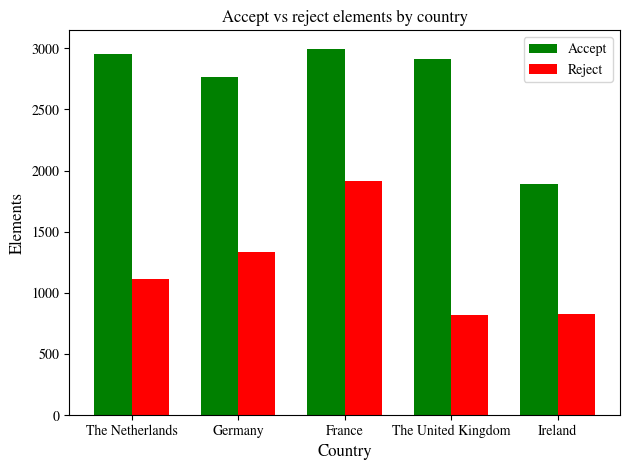

In [34]:
# Tex parameters
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# Create index + bar width
index = np.arange(len(country_labels))
bar_width = 0.35

# Create a bar plot
plt.bar(index, all_accept_counts, bar_width, color='green', label='Accept')
plt.bar(index + bar_width, all_reject_counts, bar_width, color='red', label='Reject')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Elements', fontsize=12)
plt.title('Accept vs reject elements by country')
plt.xticks(index + bar_width / 2, country_labels)
plt.legend()

# Adjust the figure layout to accommodate the legend
plt.tight_layout()

# Display the plot
plt.show()


107


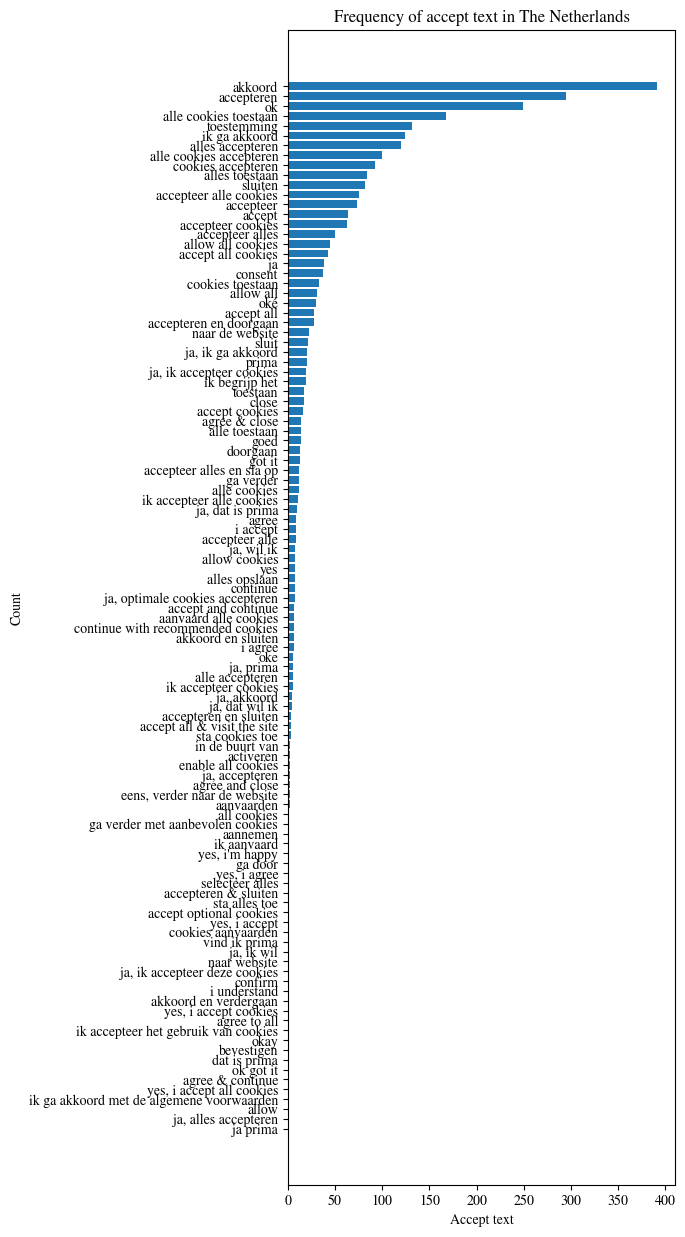

107


/home/gijs/miniconda3/envs/openwpm/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10004 (\N{HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


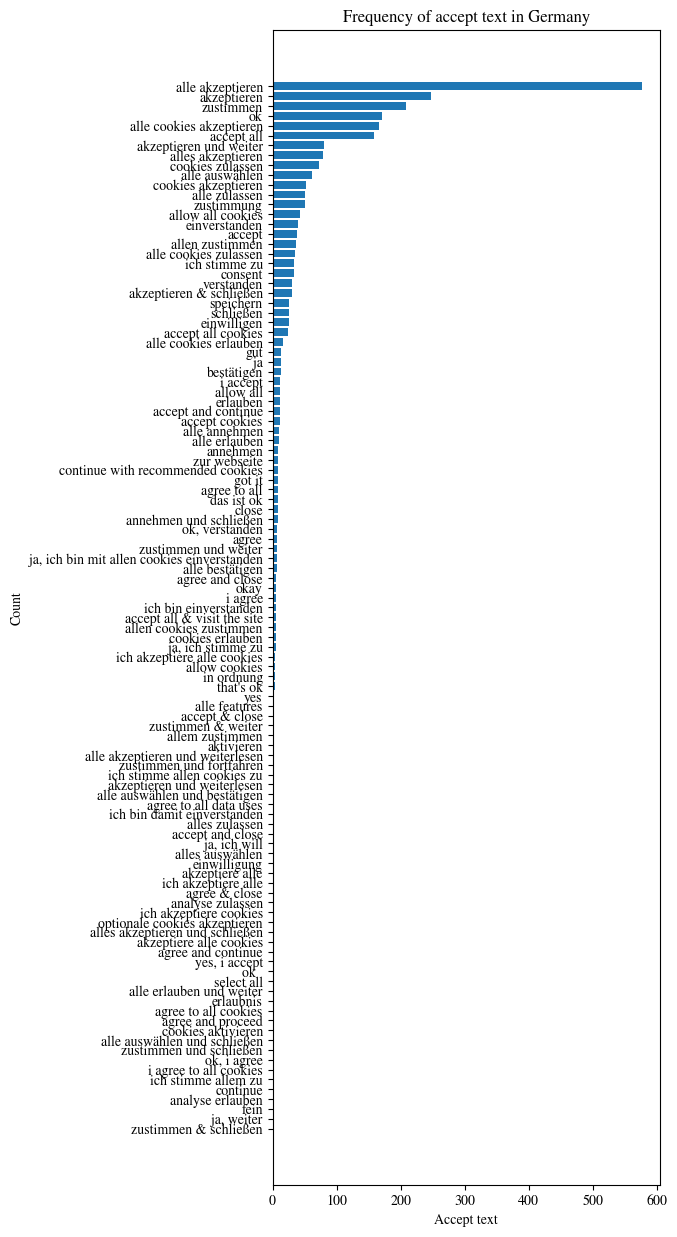

82


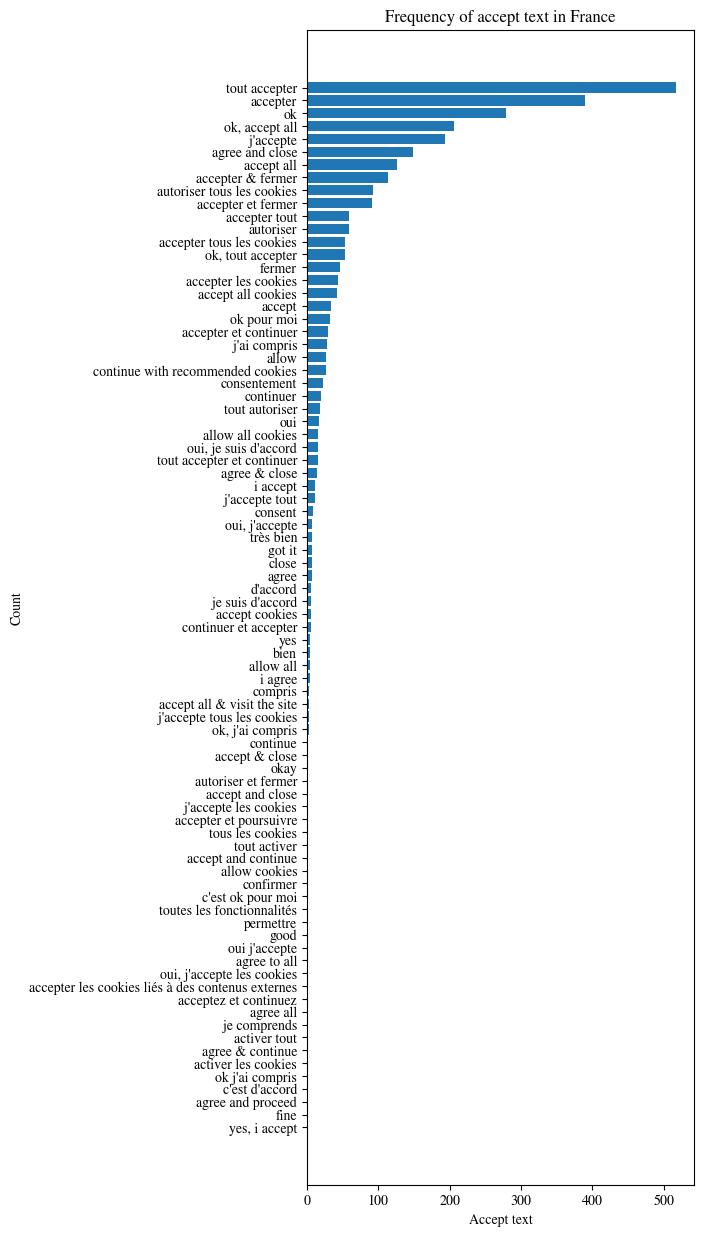

83


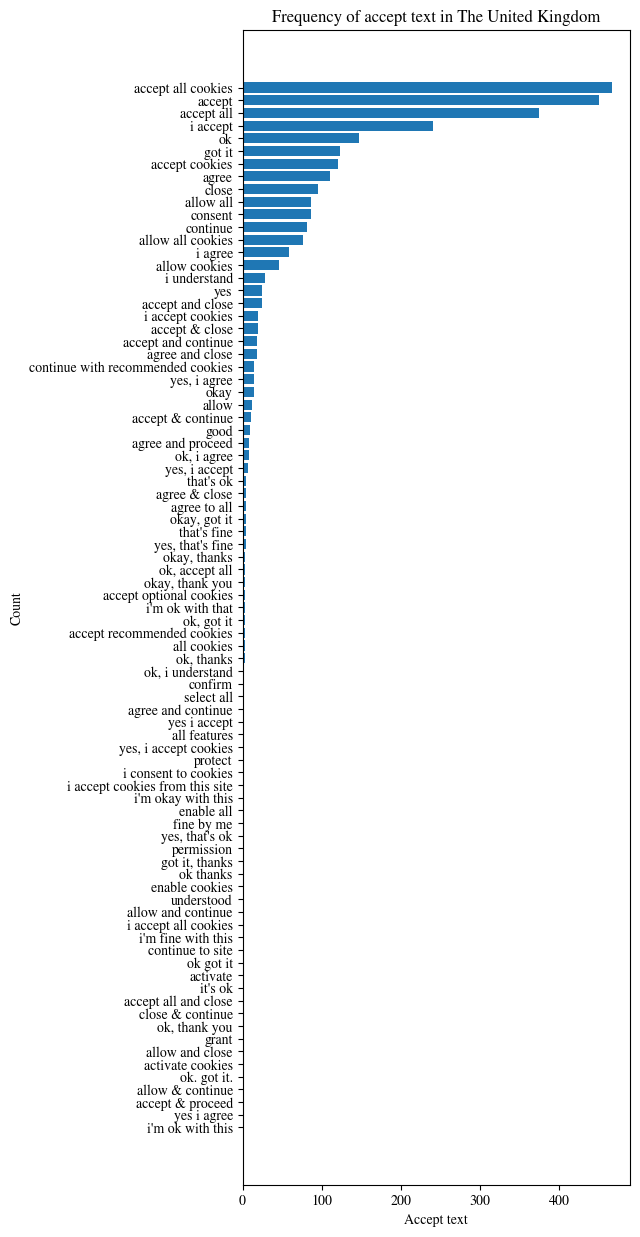

57


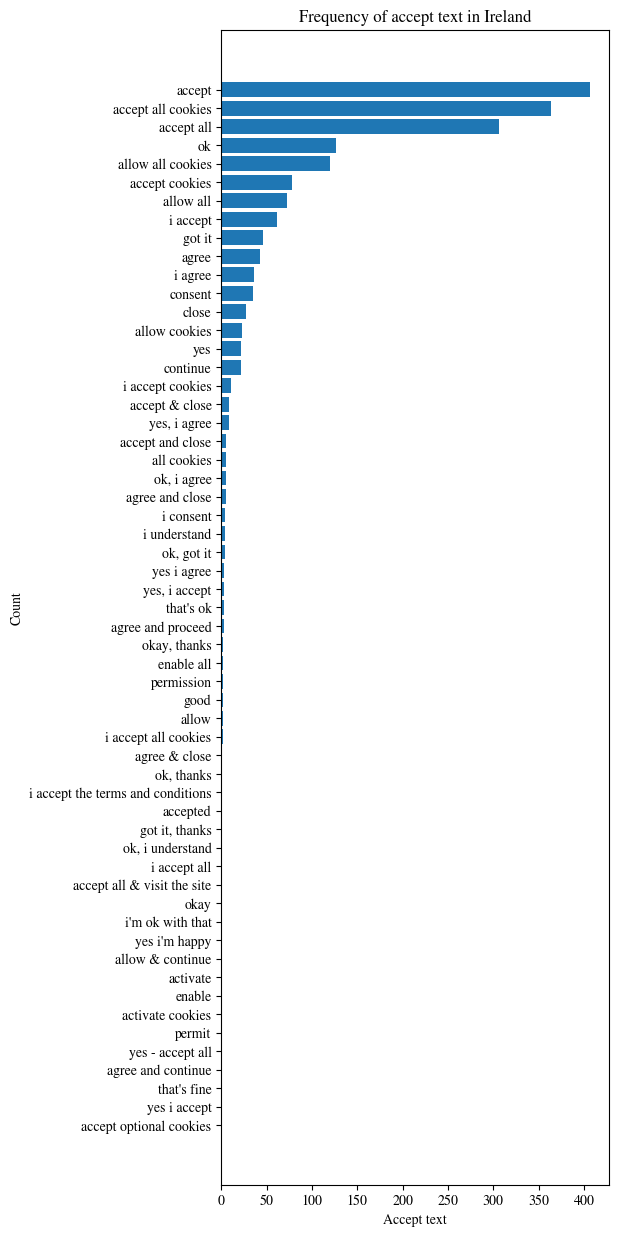

In [19]:
for i, df in enumerate(dffs):
    accept_text_counts = df['accept-text'].value_counts()
    #top_accept_text_counts = accept_text_counts.head(50)
    print(accept_text_counts.size)

    # Create bar plot
    plt.figure(figsize=(5,15))
    plt.barh(accept_text_counts.index, accept_text_counts.values)
    plt.xlabel('Accept text')
    plt.ylabel('Count')
    plt.title(f'Frequency of accept text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

87


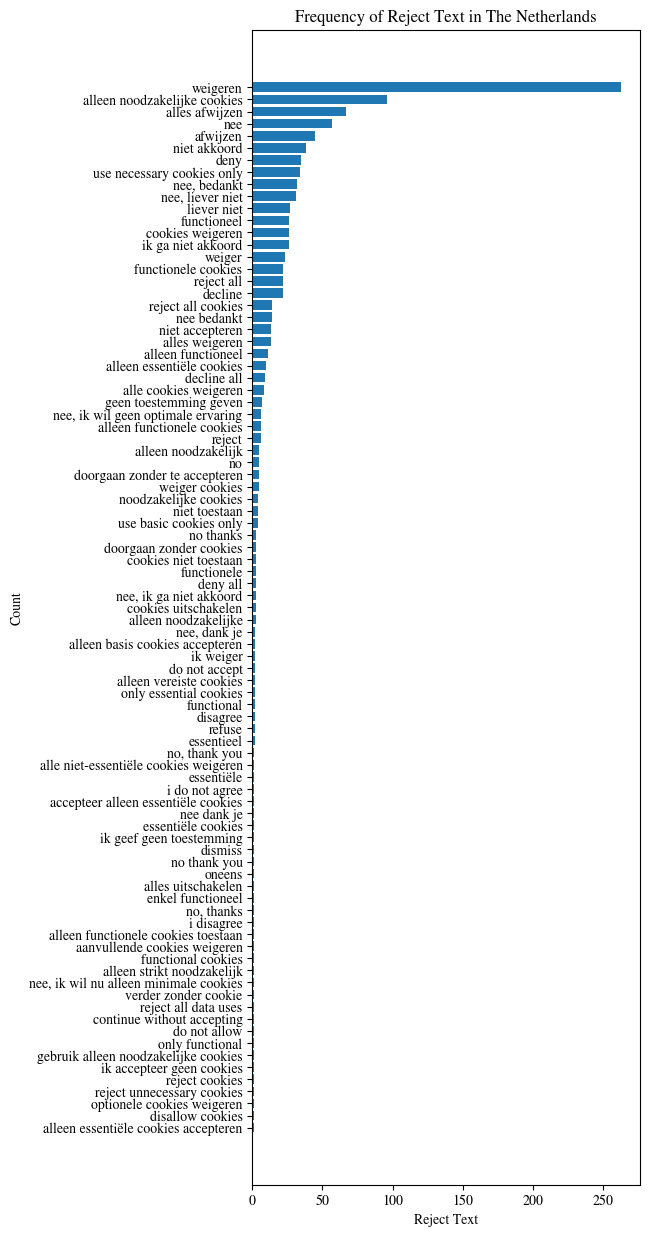

86


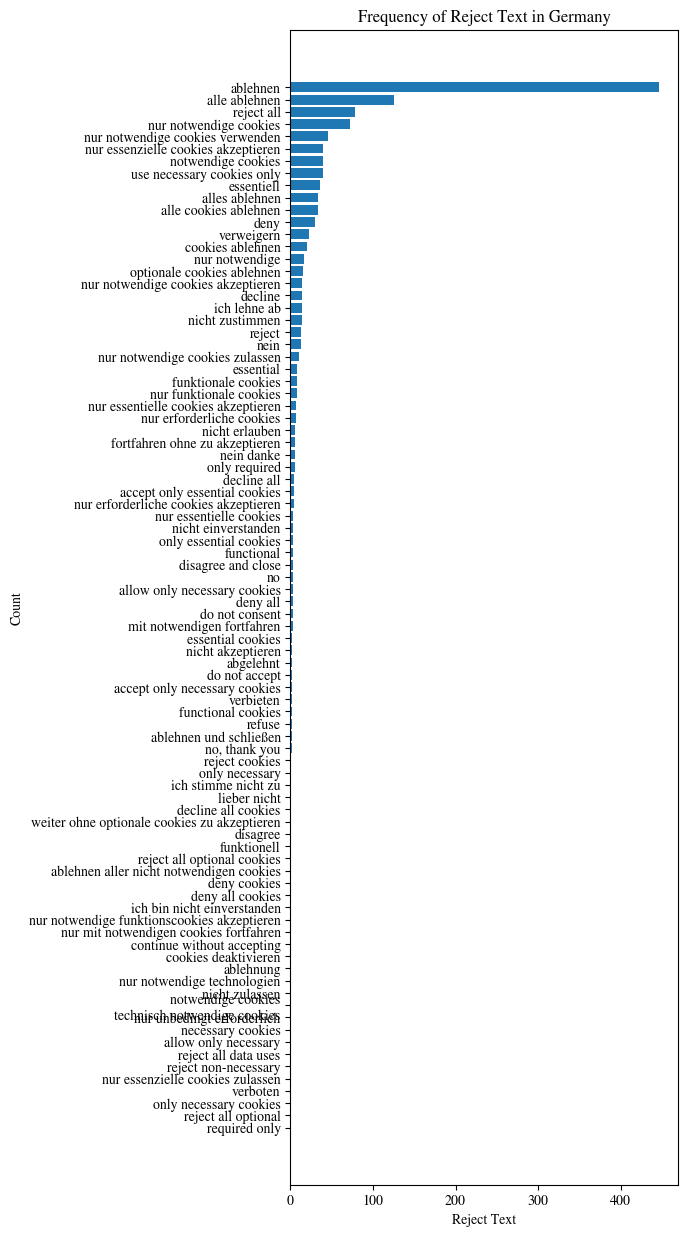

70


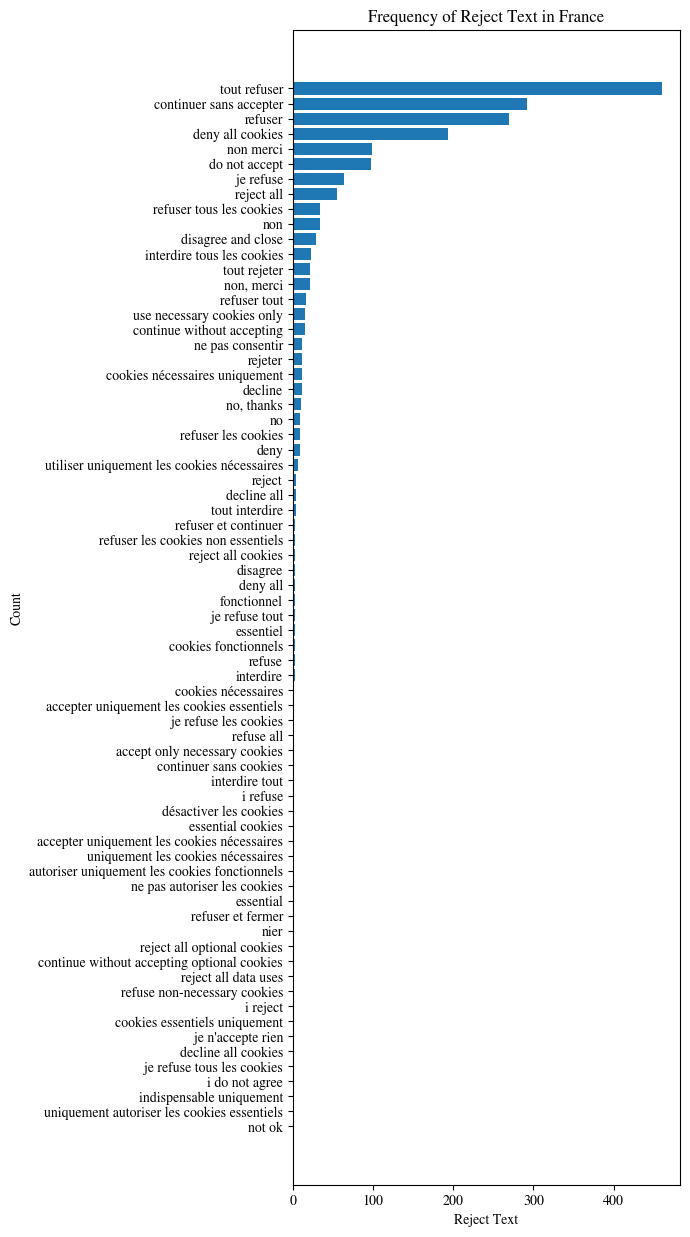

62


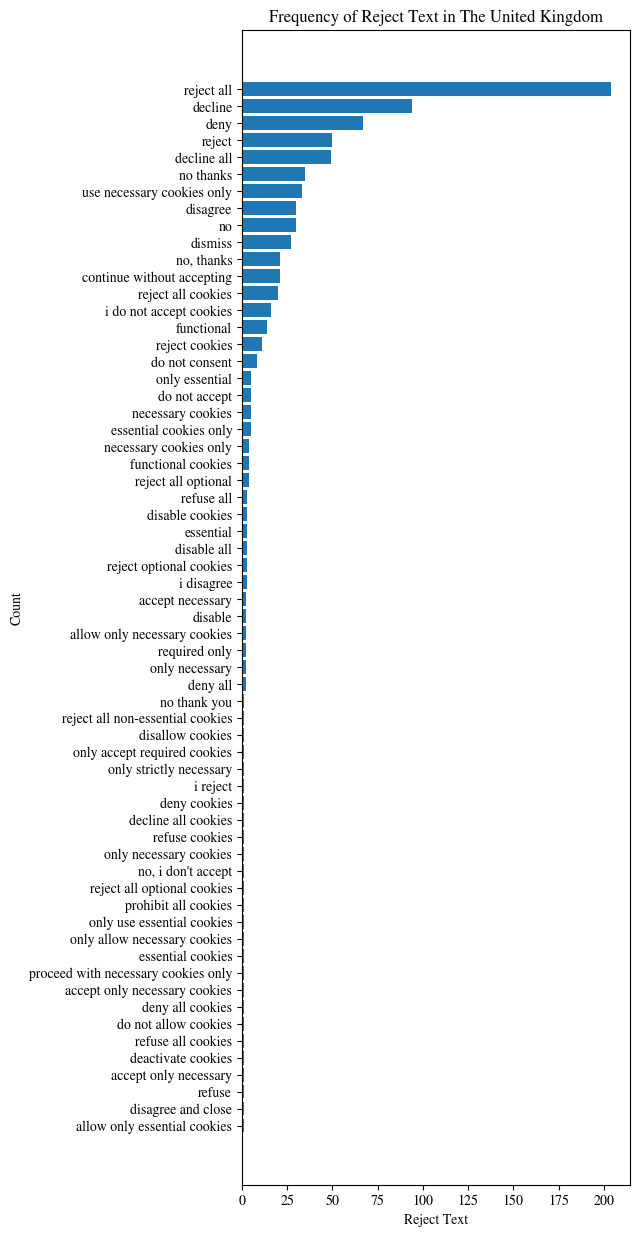

47


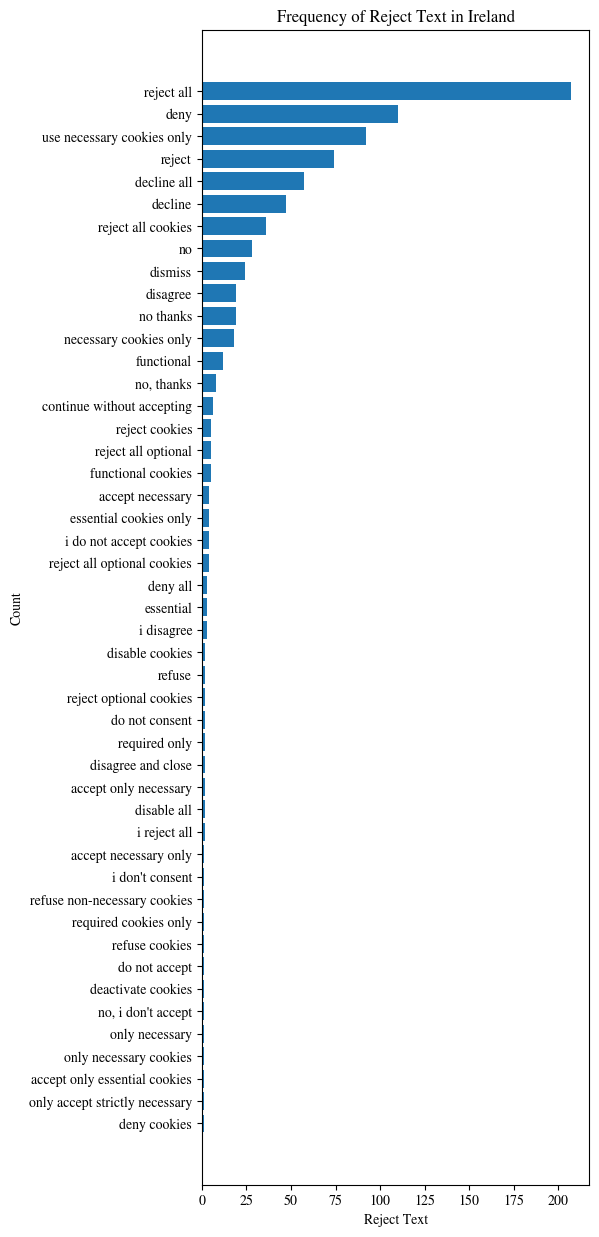

In [35]:
for i, df in enumerate(dffs):
    reject_text_counts = df['reject-text'].value_counts()
    #top_reject_text_counts = reject_text_counts.head(50)
    print(reject_text_counts.size)

    # Create bar plot
    plt.figure(figsize=(5, 15))
    plt.barh(reject_text_counts.index, reject_text_counts.values)
    plt.xlabel('Reject Text')
    plt.ylabel('Count')
    plt.title(f'Frequency of Reject Text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

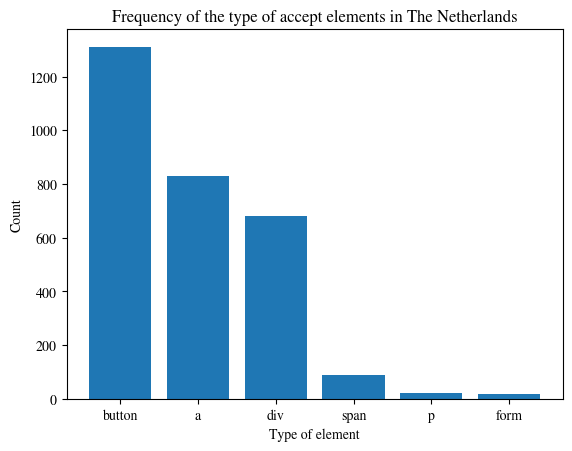

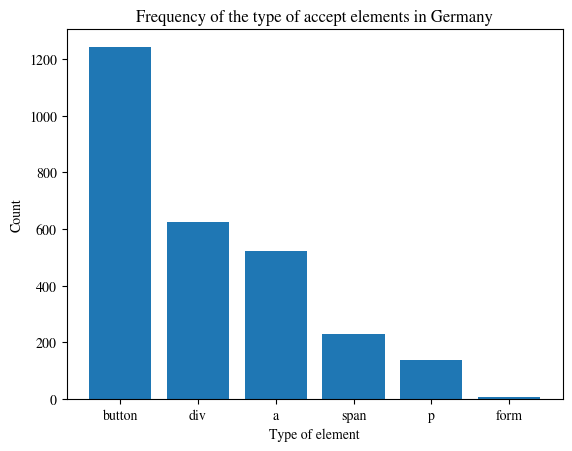

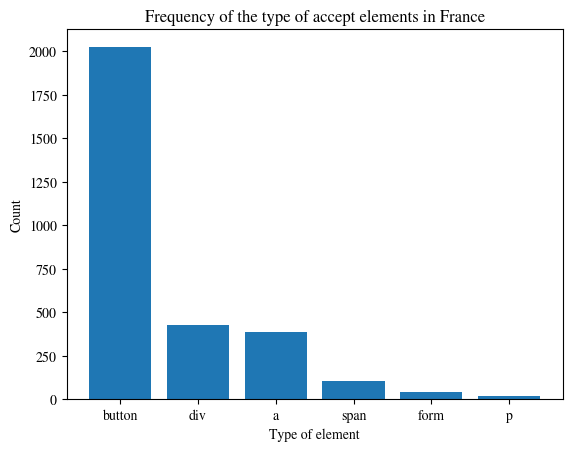

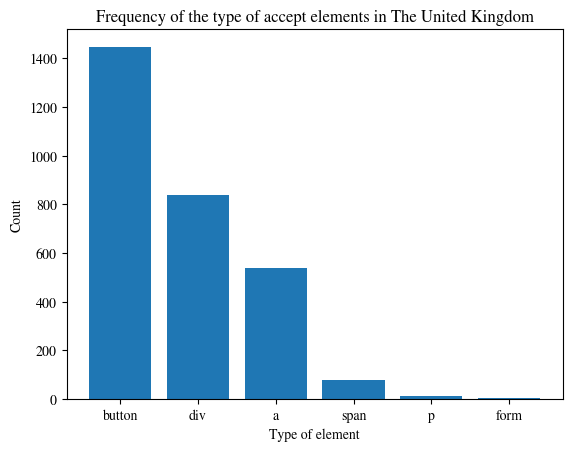

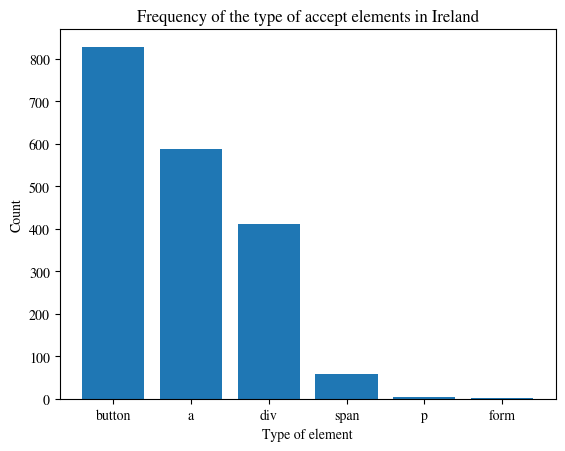

In [37]:
for i, df in enumerate(dffs):
    accept_types_counts = df['accept-type'].value_counts()

    # Create bar plot
    plt.bar(accept_types_counts.index, accept_types_counts.values)
    plt.xlabel('Type of element')
    plt.ylabel('Count')
    plt.title(f'Frequency of the type of accept elements in {country_labels[i]}')

    # Show the plot
    plt.show()

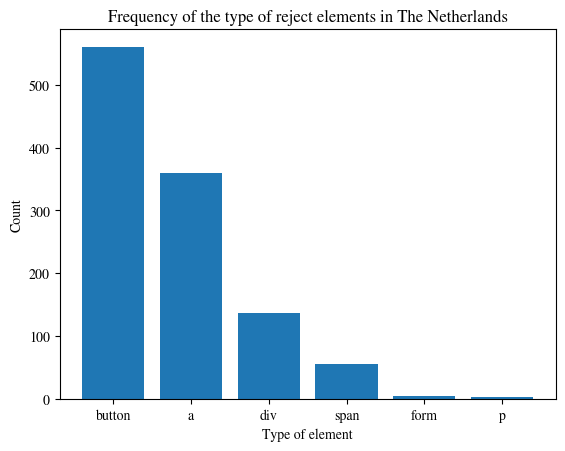

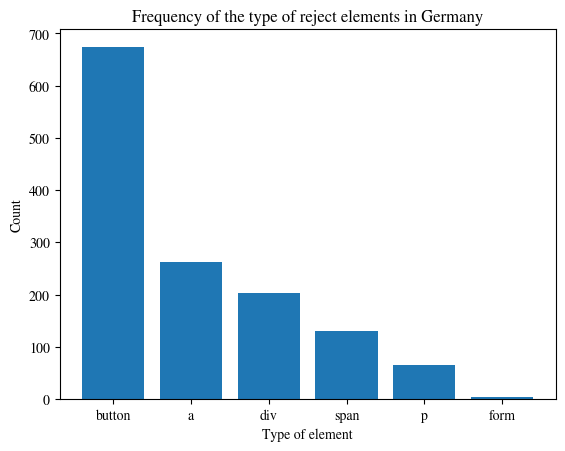

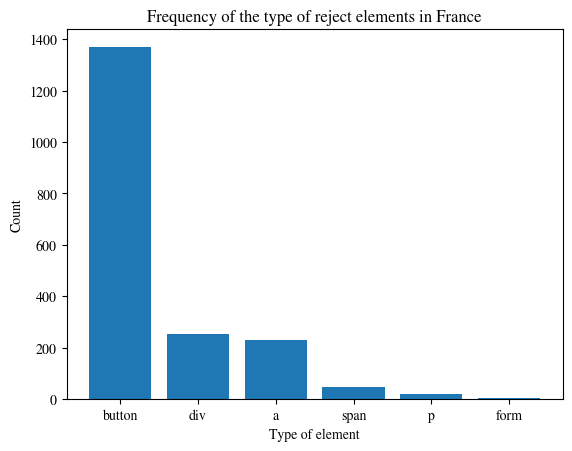

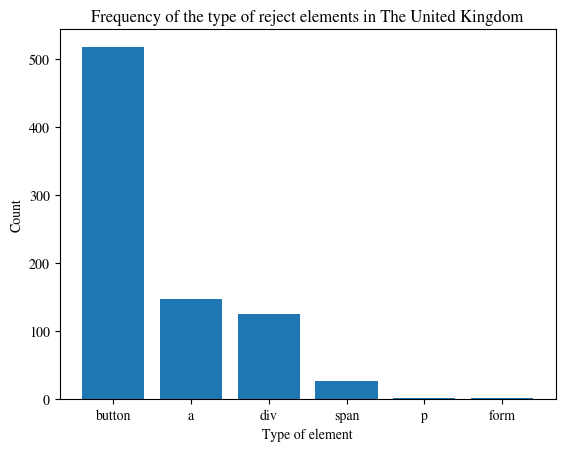

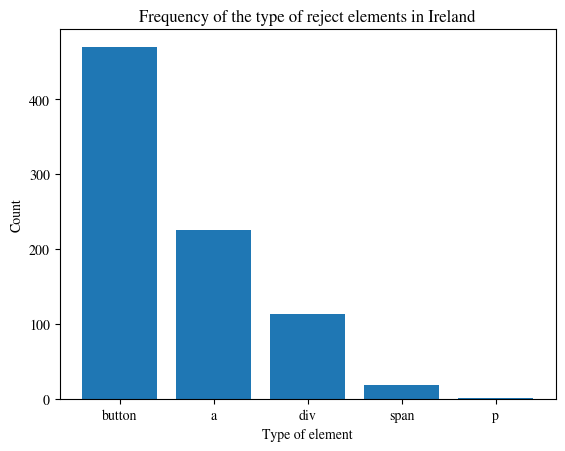

In [38]:
for i, df in enumerate(dffs):
    reject_types_counts = df['reject-type'].value_counts()

    # Create bar plot
    plt.bar(reject_types_counts.index, reject_types_counts.values)
    plt.xlabel('Type of element')
    plt.ylabel('Count')
    plt.title(f'Frequency of the type of reject elements in {country_labels[i]}')

    # Show the plot
    plt.show()

In [39]:
dfs_validation = [[], [], [], [], []]
for df in dfs:
    df.sample(50)['url'].to_string(index=False)
  

In [40]:
csv_files_nl_val = ['data_validation/data_validation_nl.csv']
csv_files_de_val = ['data_validation/data_validation_de.csv']
csv_files_fr_val = ['data_validation/data_validation_fr.csv']
csv_files_gb_val = ['data_validation/data_validation_gb.csv']
csv_files_ie_val = ['data_validation/data_validation_ie.csv']

df_nl_val = read_csv_files(csv_files_nl_val)
df_de_val = read_csv_files(csv_files_de_val)
df_fr_val = read_csv_files(csv_files_fr_val)
df_gb_val = read_csv_files(csv_files_gb_val)
df_ie_val = read_csv_files(csv_files_ie_val)

dfs_val = [df_nl_val,df_de_val,df_fr_val,df_gb_val,df_ie_val]

In [26]:
total_false_positives = 0
total_false_negatives = 0

for i, df in enumerate(dfs_val):

    # Count instances of "fn" and "fp" in "accept-correct" column
    accept_correct_counts = df["accept-correct"].value_counts()
    fn_accept_count = accept_correct_counts.get("fn", 0)
    fp_accept_count = accept_correct_counts.get("fp", 0)
    
    # Count instances of "fn" and "fp" in "reject-correct" column
    reject_correct_counts = df["reject-correct"].value_counts()
    fn_reject_count = reject_correct_counts.get("fn", 0)
    fp_reject_count = reject_correct_counts.get("fp", 0)
    
    # Get totals
    total_false_positives += fp_accept_count + fp_reject_count
    total_false_negatives += fn_accept_count + fn_reject_count
    
    print(country_labels[i])
    print("False negatives in accept:", fn_accept_count)
    print("False positives in accept:", fp_accept_count)
    print("False negatives in reject:", fn_reject_count)
    print("False positives in reject:", fp_reject_count)

print("")
print("Total false positives:", total_false_positives)
print("Total false negatives:", total_false_negatives)

The Netherlands
False negatives in accept: 3
False positives in accept: 4
False negatives in reject: 2
False positives in reject: 1
Germany
False negatives in accept: 8
False positives in accept: 2
False negatives in reject: 4
False positives in reject: 1
France
False negatives in accept: 2
False positives in accept: 3
False negatives in reject: 3
False positives in reject: 1
The United Kingdom
False negatives in accept: 3
False positives in accept: 1
False negatives in reject: 0
False positives in reject: 0
Ireland
False negatives in accept: 0
False positives in accept: 1
False negatives in reject: 0
False positives in reject: 1

Total false positives: 15
Total false negatives: 25
